# Group Survey Data Analysis and Cleaning

Analysis of ethnic group survey responses.

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the Data

In [145]:
# Load CSV file
df = pd.read_csv('results-survey335431.csv')

## Exploring and Cleaning

In [146]:
# Check data types and missing values
df.info()

# Create a clean copy of the dataframe
df_clean = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Response ID                              36 non-null     int64  
 1   Date submitted                           18 non-null     object 
 2   Last page                                18 non-null     float64
 3   Start language                           36 non-null     object 
 4   Seed                                     36 non-null     int64  
 5   Which ethnic gr..  [Moldovan]            18 non-null     object 
 6   Which ethnic gr..  [Romanian]            18 non-null     object 
 7   Which ethnic gr..  [Ukrainian]           18 non-null     object 
 8   Which ethnic gr..  [Russian]             18 non-null     object 
 9   Which ethnic gr..  [Gagauz]              18 non-null     object 
 10  Which ethnic gr..  [Bulgarian]           18 non-null

In [147]:
# Simplify column names for ethnic groups
column_mapping = {}
for col in df_clean.columns:
    if 'Which ethnic gr' in col:
        # Extract the ethnic group name from column name
        if '[Moldovan]' in col:
            column_mapping[col] = 'Moldovan'
        elif '[Romanian]' in col:
            column_mapping[col] = 'Romanian'
        elif '[Ukrainian]' in col:
            column_mapping[col] = 'Ukrainian'
        elif '[Russian]' in col:
            column_mapping[col] = 'Russian'
        elif '[Gagauz]' in col:
            column_mapping[col] = 'Gagauz'
        elif '[Bulgarian]' in col:
            column_mapping[col] = 'Bulgarian'
        elif '[Roma]' in col:
            column_mapping[col] = 'Roma'
        elif '[Prefer not to a' in col:
            column_mapping[col] = 'Prefer_not_to_answer'
        elif '[Other]' in col:
            column_mapping[col] = 'Other'

df_clean = df_clean.rename(columns=column_mapping)

In [148]:
df_clean.columns

Index(['Response ID', 'Date submitted', 'Last page', 'Start language', 'Seed',
       'Moldovan', 'Romanian', 'Ukrainian', 'Russian', 'Gagauz', 'Bulgarian',
       'Roma', 'Prefer_not_to_answer', 'Other'],
      dtype='object')

In [149]:
df_clean = df_clean.loc[~df_clean['Date submitted'].isna()]

In [150]:
df_clean = df_clean.iloc[:, 5:]

In [153]:
df_clean['Other'] = df_clean['Other'].apply(
    lambda x: 'Yes' if pd.notna(x) and x != '' else 'No')

In [154]:
df_clean

,Moldovan,Romanian,Ukrainian,Russian,Gagauz,Bulgarian,Roma,Prefer_not_to_answer,Other
0,No,No,No,No,No,No,No,No,Yes
5,No,Yes,No,No,No,No,No,No,No
7,No,Yes,No,No,No,No,No,No,No
8,Yes,Yes,No,Yes,Yes,No,No,No,No
9,Yes,No,No,No,No,No,No,No,No
10,Yes,No,No,No,No,No,No,No,No
12,Yes,No,No,No,No,No,No,No,No
13,No,Yes,No,No,No,No,No,No,No
16,No,Yes,No,No,No,No,No,No,No
17,Yes,No,No,No,No,No,No,No,No


In [ ]:
# # Convert Yes/No to binary (1/0) for analysis
# for col in df_clean:
#     if col in df_clean.columns:
#         df_clean.loc[:, f'{col}_binary'] = df_clean[col].map({'Yes': 1, 'No': 0})

# binary_cols = [col for col in df_clean.columns if '_binary' in col]

## 4. Analysis

In [115]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 34
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Moldovan              18 non-null     object
 1   Romanian              18 non-null     object
 2   Ukrainian             18 non-null     object
 3   Russian               18 non-null     object
 4   Gagauz                18 non-null     object
 5   Bulgarian             18 non-null     object
 6   Roma                  18 non-null     object
 7   Prefer_not_to_answer  18 non-null     object
 8   Other                 18 non-null     object
dtypes: object(9)
memory usage: 1.4+ KB


In [152]:
df_clean

,Moldovan,Romanian,Ukrainian,Russian,Gagauz,Bulgarian,Roma,Prefer_not_to_answer,Other
0,No,No,No,No,No,No,No,No,Ferenghi
5,No,Yes,No,No,No,No,No,No,NaN
7,No,Yes,No,No,No,No,No,No,NaN
8,Yes,Yes,No,Yes,Yes,No,No,No,NaN
9,Yes,No,No,No,No,No,No,No,NaN
10,Yes,No,No,No,No,No,No,No,NaN
12,Yes,No,No,No,No,No,No,No,NaN
13,No,Yes,No,No,No,No,No,No,NaN
16,No,Yes,No,No,No,No,No,No,NaN
17,Yes,No,No,No,No,No,No,No,NaN


In [129]:
df_clean.apply(lambda row: (row == 'Yes').sum(), axis=1)

0     1
5     1
7     1
8     4
9     1
10    1
12    1
13    1
16    1
17    1
18    1
19    1
26    1
28    1
30    1
31    1
32    1
34    1
dtype: int64

<Axes: >

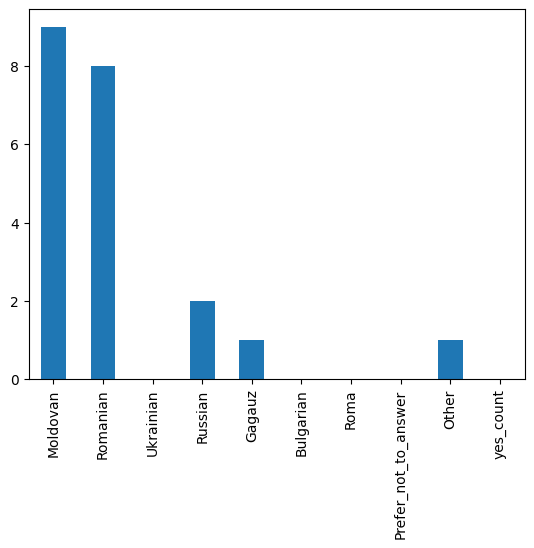

In [130]:
df_clean.apply(lambda col: (col == 'Yes').sum()).plot(kind='bar')

In [ ]:
# Let's find out how many respondents have one



# Filter rows with more than one "Yes"
multiple_identities = df_clean[df_clean['yes_count'] > 1]

print(f"Number of respondents with multiple identities: {len(multiple_identities)}")
print("\nRows with multiple 'Yes' responses:")
print(multiple_identities[['Response ID'] + df_clean.columns + ['yes_count']])

Number of respondents with multiple identities: 1

Rows with multiple 'Yes' responses:


KeyError: "None of [Index(['Response IDMoldovanyes_count', 'Response IDRomanianyes_count',\n       'Response IDUkrainianyes_count', 'Response IDRussianyes_count',\n       'Response IDGagauzyes_count', 'Response IDBulgarianyes_count',\n       'Response IDRomayes_count', 'Response IDPrefer_not_to_answeryes_count',\n       'Response IDOtheryes_count', 'Response IDyes_countyes_count'],\n      dtype='object')] are in the [columns]"

In [13]:
# Count responses for each ethnic group
response_counts = {}
for col in ethnic_cols_clean:
    if col in df_clean.columns:
        yes_count = (df_clean[col] == 'Yes').sum()
        response_counts[col] = yes_count

response_df = pd.DataFrame.from_dict(response_counts, orient='index', columns=['Count'])
response_df = response_df.sort_values('Count', ascending=False)

print("\nEthnic group identification counts:")
print(response_df)


Ethnic group identification counts:
           Count
Moldovan       9
Romanian       8
Russian        2
Gagauz         1
Ukrainian      0
Bulgarian      0
Roma           0


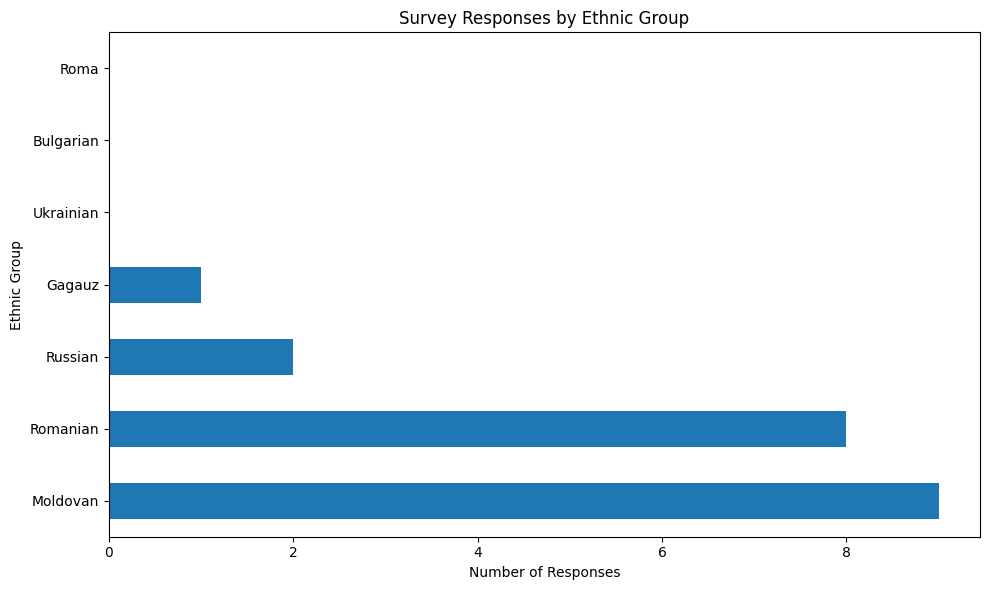

In [14]:
# Visualize responses
fig, ax = plt.subplots(figsize=(10, 6))
response_df.plot(kind='barh', ax=ax, legend=False)
ax.set_xlabel('Number of Responses')
ax.set_ylabel('Ethnic Group')
ax.set_title('Survey Responses by Ethnic Group')
plt.tight_layout()
plt.show()

In [15]:
# Count multiple identities
binary_cols = [f'{col}_binary' for col in ethnic_cols_clean if f'{col}_binary' in df_clean.columns]
df_clean['identity_count'] = df_clean[binary_cols].sum(axis=1)

print("\nDistribution of multiple identities:")
print(df_clean['identity_count'].value_counts().sort_index())


Distribution of multiple identities:
identity_count
0.0    19
1.0    16
4.0     1
Name: count, dtype: int64


In [16]:
# Check 'Other' responses
if 'Other' in df_clean.columns:
    other_responses = df_clean[df_clean['Other'].notna() & (df_clean['Other'] != '')]['Other']
    print("\nOther ethnic group responses:")
    print(other_responses.tolist())


Other ethnic group responses:
['Ferenghi']


## 5. Export Cleaned Data

In [ ]:
# Save cleaned data to new CSV
df_clean.to_csv('results-survey335431_cleaned.csv', index=False)
print("Cleaned data saved to 'results-survey335431_cleaned.csv'")

In [ ]:
# Display final cleaned dataframe
df_clean.head()